In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [2]:
# let the signal be box-like
signal = np.repeat([0., 1., 0.], 100)
# and use a gaussian filter
# the filter should be shorter than the signal
# the filter should be such that it's much bigger then zero everywhere
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )
print(gauss.min())  # = 0.013 >> 0
list(signal).count(1)

0.0130329074485


100

In [5]:
np.convolve([1, 2, 3], [0, 1, 0.5])

array([ 0. ,  1. ,  2.5,  4. ,  1.5])

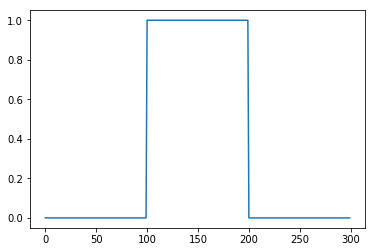

In [7]:
plt.plot(signal)

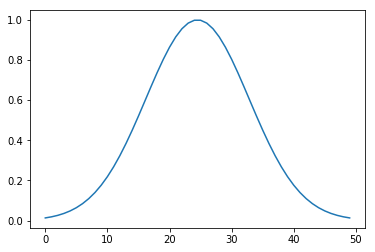

In [8]:
plt.plot(gauss)

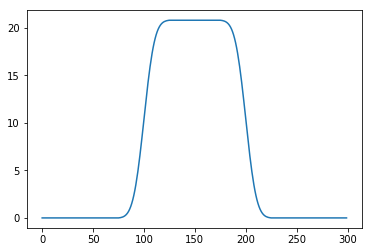

In [9]:
filtered = np.convolve(signal, gauss, mode='same') 
plt.plot(filtered)

In [3]:
# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
#filtered = scipy.signal.convolve(signal, gauss, mode='same') 
filtered = np.convolve(signal, gauss, mode='same') 

deconv,  _ = scipy.signal.deconvolve( filtered, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 
s = (len(signal)-n)/2
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 

TypeError: slice indices must be integers or None or have an __index__ method

In [1]:
#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

plt.savefig(__file__ + ".png")
plt.show()    

SyntaxError: invalid syntax (<ipython-input-1-c9678ed6988f>, line 11)